# Testing

In [1]:
from Lab_Analyses.Utilities import load_mat_files
from Lab_Analyses.Behavior import process_lever_behavior as plb
from Lab_Analyses.Behavior import summarize_lever_behavior as slb

In [2]:
path = r'Z:\People\Jake\Behavior\JW003\211019\JW003_8MW'
fname = 'data_@lever2p_ITIOptoPulsed_JW_JW003_210919a'

behavior_data = plb.process_lever_press_behavior(path, True)

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\process_lever_behavior.py:405: ComplexWarning: Casting complex values to real discards the imaginary part
  lever_velocity_envelope = np.sqrt(


In [3]:
summarized_data = slb.summarize_lever_behavior(behavior_data)

7
8
10


In [4]:
summarized_data.movement_matrix

array([[-1.02819585, -1.02818073, -1.02816551, ..., -1.15045179,
        -1.15042017, -1.15038871],
       [-1.08086025, -1.08086092, -1.08086173, ..., -1.40795265,
        -1.40840828, -1.4088594 ],
       [-1.10551809, -1.10549106, -1.10546433, ..., -1.14011554,
        -1.14010992, -1.14010423]])

(-2.5, 0.0)

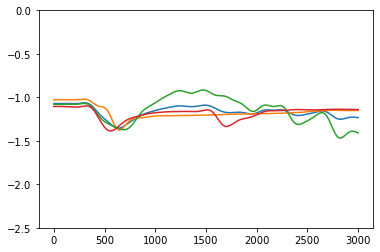

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(summarized_data.movement_avg)
plt.plot(summarized_data.movement_matrix[0,:])
plt.plot(summarized_data.movement_matrix[1,:])
plt.plot(summarized_data.movement_matrix[2,:])
plt.ylim((-2.5,0))

In [23]:
summarized_data.avg_cue_to_reward

2.8206666666666664

In [26]:
summarized_data.number_of_movements_during_ITI

[29, 3, 47]

In [8]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8,9])
b= [True,False,True,False,True,True,False,False,False]
a[np.nonzero(b)[0]]

array([1, 3, 5, 6])

In [9]:
c = np.nonzero(b)
print(c[0])

[0 2 4 5]


In [10]:
a[np.array(b)]

array([1, 3, 5, 6])

In [11]:
a = [1,2,3,np.nan]

In [12]:
np.min(a)

nan